In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("cardekho_data.csv")

In [3]:
dataset.head(2)

Car_Name  Year  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz  2014           5.59       27000    Petrol      Dealer   
1      sx4  2013           9.54       43000    Diesel      Dealer   

  Transmission  Owner  Selling_Price  
0       Manual      0           3.35  
1       Manual      0           4.75

In [4]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name

In [6]:
Car_Name_le = LabelEncoder()
dataset["Car_Name"] = Car_Name_le.fit_transform(dataset["Car_Name"])

Fuel Type

In [7]:
dataset["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
Fuel_Type_le = LabelEncoder()
dataset["Fuel_Type"] = Fuel_Type_le.fit_transform(dataset["Fuel_Type"])

Seller_type

In [9]:
Seller_Type_le = LabelEncoder()
dataset["Seller_Type"] = Seller_Type_le.fit_transform(dataset["Seller_Type"])

Transmission

In [10]:
Transmission_le = LabelEncoder()
dataset["Transmission"] = Transmission_le.fit_transform(dataset["Transmission"])

In [11]:
dataset.head()

Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0        90  2014           5.59       27000          2            0   
1        93  2013           9.54       43000          1            0   
2        68  2017           9.85        6900          2            0   
3        96  2011           4.15        5200          2            0   
4        92  2014           6.87       42450          1            0   

   Transmission  Owner  Selling_Price  
0             1      0           3.35  
1             1      0           4.75  
2             1      0           7.25  
3             1      0           2.85  
4             1      0           4.60

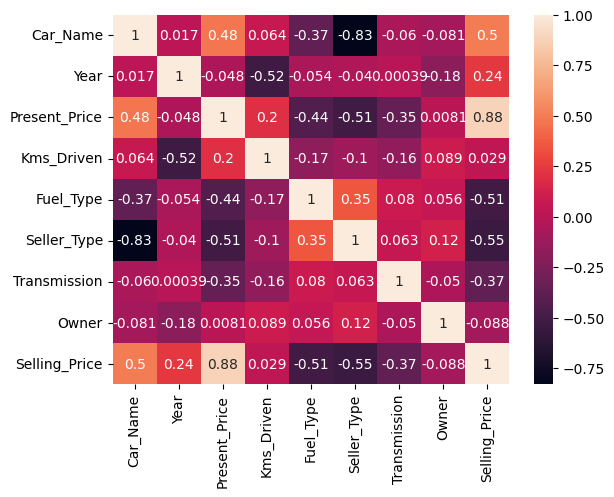

In [12]:
sns.heatmap(data=dataset.corr(),annot=True) #check for linear regresion
plt.show()

In [13]:
input_data = dataset.iloc[:,:-1] #scaling input data
output_data = dataset["Selling_Price"]

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100

(88.40630578239453, 84.65539666857805)

In [21]:
# lr1 = Lasso(alpha=0.05)
# lr1.fit(x_train,y_train)
# lr1.score(x_train,y_train)*100 , lr1.score(x_test,y_test)*100

In [22]:
# lr2 = Ridge(alpha=5)
# lr2.fit(x_train,y_train)
# lr2.score(x_train,y_train)*100 , lr2.score(x_test,y_test)*100

In [23]:
# lr3 = Ridge(alpha=5)
# lr3.fit(x_train,y_train)
# lr3.score(x_train,y_train)*100 , lr3.score(x_test,y_test)*100 

In [24]:
dt = DecisionTreeRegressor(max_depth=16)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 92.05752699543758)

In [25]:
mean_squared_error(y_test,dt.predict(x_test)) , mean_absolute_error(y_test,dt.predict(x_test))

(1.8295950819672135, 0.7716393442622951)

In [26]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(98.54067394065757, 96.61382661986917)

In [27]:
mean_squared_error(y_test,rf.predict(x_test)) , mean_absolute_error(y_test,rf.predict(x_test))

(0.7800248309836068, 0.5856245901639346)

In [28]:
# sv = SVR()
# sv.fit(x_train,y_train)
# sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

In [29]:
# knn = KNeighborsRegressor(n_neighbors=10)
# knn.fit(x_train,y_train)
# knn.score(x_train,y_train)*100 , knn.score(x_test,y_test)*100

In [30]:
# mean_squared_error(y_test,knn.predict(x_test)) , mean_absolute_error(y_test,knn.predict(x_test))

In [31]:
rf.predict([[-1.275759,0.821718,-0.817924,-0.333500,0.500183,1.356327,-2.554408,-0.17450]])


c:\Users\91931\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.451])

In [32]:
x_test

Car_Name      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
177 -1.275759  0.821718      -0.817924   -0.333500   0.500183     1.356327   
289  0.251795  0.821718       0.691970   -0.668875   0.500183    -0.737285   
228  1.230996 -0.563924       0.205282    0.593804  -1.852241    -0.737285   
198 -2.059120 -0.910335      -0.817924   -0.050157   0.500183     1.356327   
60   0.330131 -0.217514       1.272521    0.078661   0.500183    -0.737285   
..        ...       ...            ...         ...        ...          ...   
234  0.760979  0.475308      -0.223468   -0.835995   0.500183    -0.737285   
296  0.251795  0.821718       0.460214   -0.076225  -1.852241    -0.737285   
281  0.251795 -2.642389      -0.003299    0.347965   0.500183    -0.737285   
285  0.956819  0.821718       0.100991   -0.563806   0.500183    -0.737285   
182 -1.158255 -0.217514      -0.816765   -0.178949   0.500183     1.356327   

     Transmission     Owner  
177     -2.554408 -0.174501  
289      0.391480 -0.174501  
228      0.391480 -0.174501  
198      0.391480  3.865859  
60       0.391480 -0.174501  
..            ...       ...  
234      0.391480 -0.174501  
296      0.391480 -0.174501  
281      0.391480 -0.174501  
285     -2.554408 -0.174501  
182      0.391480 -0.174501  

[61 rows x 8 columns]

In [33]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [34]:
new_data=pd.DataFrame([["ritz",2014,5.59,27000,"Petrol","Dealer","Manual",0]],columns=x_train.columns)
				


In [35]:
new_data

Car_Name  Year  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz  2014           5.59       27000    Petrol      Dealer   

  Transmission  Owner  
0       Manual      0

In [36]:
# rf.predict(new_data)

In [37]:
new_data["Car_Name"]=Car_Name_le.transform(new_data["Car_Name"])

In [38]:
new_data["Fuel_Type"]=Fuel_Type_le.transform(new_data["Fuel_Type"])

In [39]:
new_data["Seller_Type"]=Seller_Type_le.transform(new_data["Seller_Type"])

In [40]:
new_data["Transmission"]=Transmission_le.transform(new_data["Transmission"])

In [41]:
new_data = pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

In [42]:
new_data

Car_Name      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0  1.074323  0.128897      -0.236215   -0.256224   0.500183    -0.737285   

   Transmission     Owner  
0       0.39148 -0.174501

In [43]:
rf.predict(new_data)

array([3.7395])